# Lab 10 – Classification

Name: Jimmy Pronchick

Class: CSCI 349 - Intro to Data Mining  
Semester: Spring 2023
Instructor: Brian King

Due: Wednesday, March 22

## Objectives
* More visualization and EDA for classification problems
* Building and evaluating models with sklearn

## Introduction 
This is your introductionto building classification models using scikit-learn (sklearn), and equally important evaluating them for performance assessment.There are also more visual EDA exercises to strengthen your plotting skills.

In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

You WILL be importing numerous additional packages beyond the above as you work through the lab.You won't be told what to import. You should be able to figure that outusing Google as your assistant. Generally, I recommend keeping all of your import statements neat and organized in the top cell of your notebook file. Though, if you want to keep this as a reference (which you should), it wouldn't hurt you to include it in the top cell AND also in the cell where you are answering the question. 

---
# Exercises

**1)** [P] Read about the famous Fisher's Iris dataset. This is perhaps the most commonly used dataset to teach students how to build classification models: https://en.wikipedia.org/wiki/Iris_flower_data_set:

Then, include the following code to import a copy of the Iris data from Seaborn's library of datasets: `df_iris = sns.load_dataset('iris')`

Print out the results of info() to understand the types of each variableas read in from the csv file.

In [10]:
%matplotlib inline
df_iris = sns.load_dataset('iris')
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**2)**[P] Be thankful for a moment, because the data are clean. However, the species variable needs work. Convert the variable to a pandas Categorical variable. Then show the distribution of your variable(how many of each species?). Repeat the info()output to show that your variable is now categorical, and not merely an object.

In [11]:
df_iris.species = pd.Categorical(df_iris.species)
df_iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [12]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


**3)**[P] Now, perform essential summarizing tasks on your data. Show the output of describe()and show the first 10 observations.

In [13]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


---
## More visual EDA and plotting

It's far more telling to generate good visualizations of your data. You will generate numerous plots of your data. Use the interface of your choosing. Any of matplotlib, seaborn, plotly, or a combination of all, are acceptable. (HINT -Sometimes for quick visualizations, the pandas interface to matplotlib is simple, effectiveand the way to go! For example, df_iris.boxplot()! )

Do we need to normalize these data for visualizations? All four variables are measurements on the same scale. It's actually more telling to ensure they are on the original scale and not normalized in any way. Remember –a data scientist has a wealth of tools and tricks to accomplish a large number of tasks to get from raw data to models, predictions, and visualizations. Don't ever start blindly applying random steps! That will always lead you to dangerous territory in data science, possibly causing you to draw conclusions that will only get you in trouble.

**For these plots, minimally, be sure to title and label your plots!**

**4)**[P] Always start with basic univariate plots. Create a single boxplot showing the distribution of each of the four independent variables on one plot, using a boxplot. Ignore the target variable species for the time.  For example:

Text(0.5, 1.0, "Fisher's Iris Data")

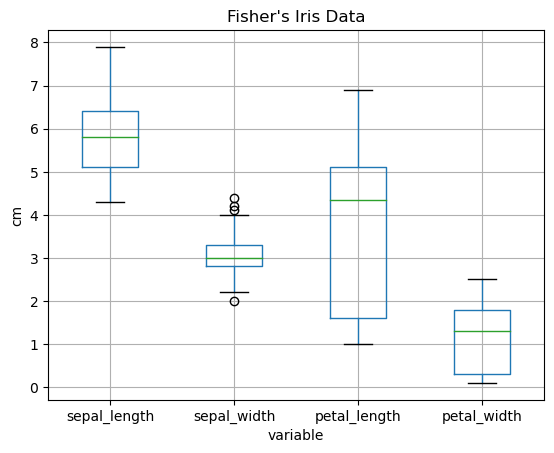

In [15]:
df_iris.boxplot()
plt.xlabel('variable')
plt.ylabel('cm')
plt.title('Fisher\'s Iris Data')

## "Melting"your data into a long format

In [28]:
df_iris_melt=pd.melt(df_iris,id_vars='species')

**5)**[M/P] Violin plots are becoming increasingly common in data science. First, briefly explain what a violin plot is. Then, figure out how to generate a univariate violin plot of each independent variable. Compare and contrast your violin plot against the boxplot.(NOTE: Seaborn makes this very easy!)

A violin plot is a distribution curve and a boxplot combined, they allow for comparison of distribution curves of variables on the same axis.

Text(0.5, 1.0, "Fisher's Iris Data")

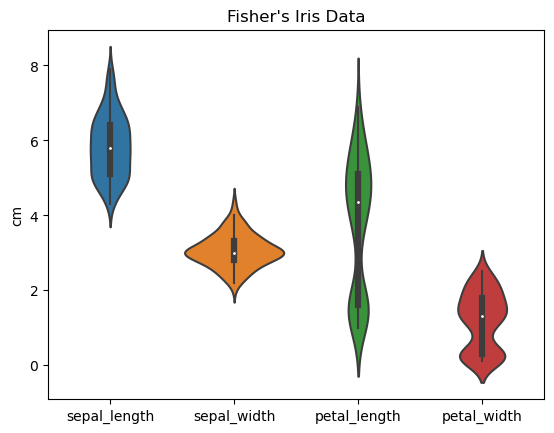

In [16]:
sns.violinplot(df_iris)
plt.ylabel('cm')
plt.ylabel('cm')
plt.title('Fisher\'s Iris Data')

**6)**[P] Show a histogramand/or a density plotof each variableon a single plot. And be sure to provide some way to see the distribution of all four variables separately. You could use alpha blending on the histogram, or perhaps consider a "rugplot" overlaid on top. 

Text(0.5, 1.0, "Fisher's Iris Data")

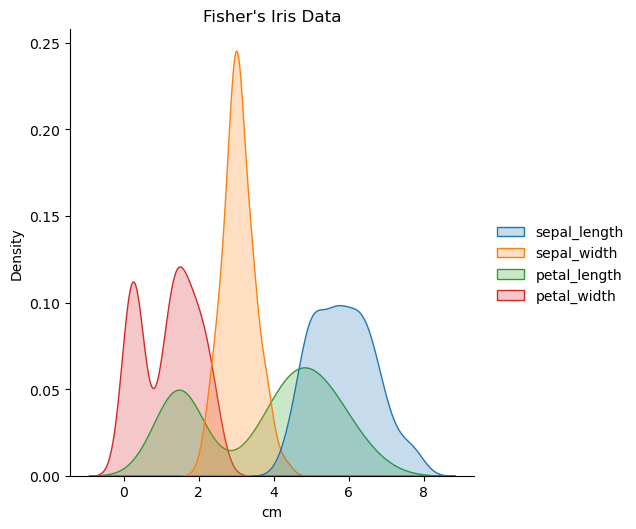

In [17]:
sns.displot(df_iris,kind='kde',fill=True)
plt.xlabel('cm')
plt.title('Fisher\'s Iris Data')

**7)**[M] Summarize your findings from these plots. Is one most ideal for understanding yourdistribution? Characterize the distributionof your four variables. Remember, this is a univariate exploration, so you don't careabout the class variable yet.

The overlayed density plots are the most ideal for comparing the distributions, since the curves are laid on top of each other but you are still able to read their indivdual distributions. Sepal length and width are normally distributed while petal length and width have bimodal distributions. This is likely because the setosa petal measurements are so distinct from the other two species, so they form their own peak.

Now, you will perform some basic multivariate analyses. If you're NOT using plotly, be sure to explore how to make plotslarge enough to examineusing the figsizeparameter. A reasonable size should be (10,8)

**8)**[P] Use the pandas interface to generate a quick boxplot (df_iris.boxplot()!)  However, look up how to created a faceted boxplot with each variable listed in a separate plot, automatically showing the distributions of your variables by "species". 

array([[<AxesSubplot: title={'center': 'petal_length'}, xlabel='[species]'>,
        <AxesSubplot: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

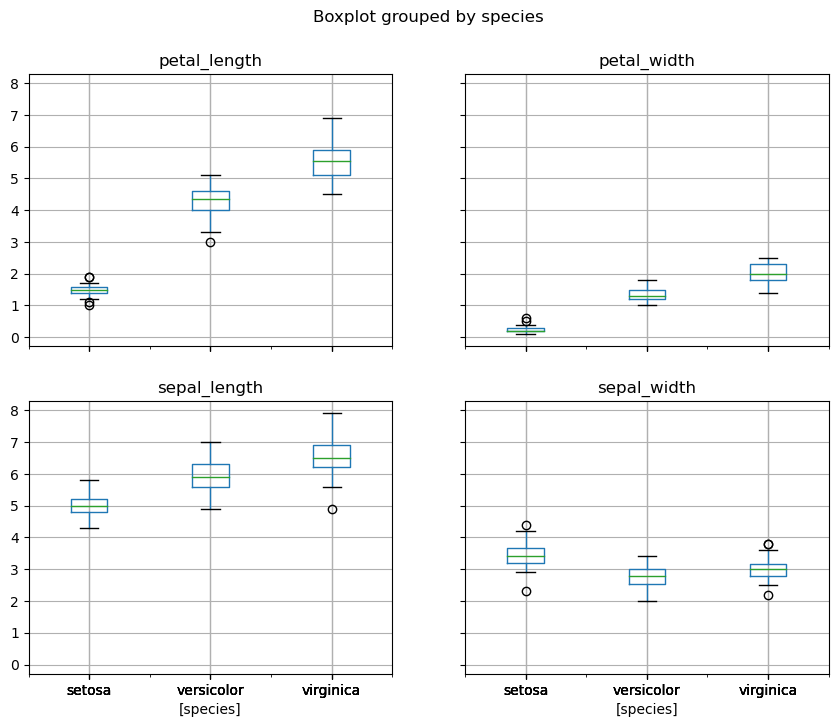

In [366]:
df_iris.boxplot(by='species',figsize=(10,8))

**9)**[P] Use either seaborn or plotly to generate aboxplot over each variable, but now showing the three different species as distinct boxplots. For example:

Text(0.5, 1.0, "Fisher's Iris Data")

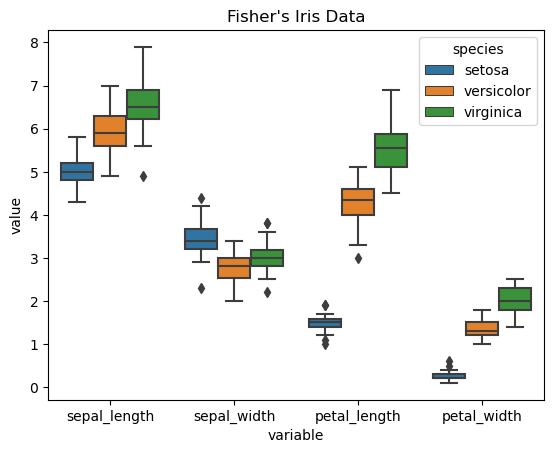

In [34]:
sns.boxplot(data=df_iris_melt,x=df_iris_melt.variable,y=df_iris_melt.value,hue='species',)
plt.title('Fisher\'s Iris Data')

**10)**[P] Generate a violin plotover all variables much like the previous boxplot, but again, be sure toindicate the species as a distinct color.

Text(0.5, 1.0, "Fisher's Iris Data")

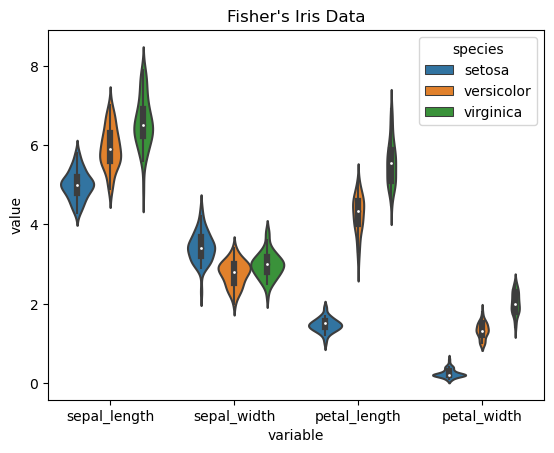

In [40]:
sns.violinplot(data=df_iris_melt,x=df_iris_melt.variable,y=df_iris_melt.value,hue='species')
plt.title('Fisher\'s Iris Data')

**11)**[P] Read about the `scatter_matrix()` function in pandas. Use it to generate a scatterplot matrix, and use species for the color.

array([[<AxesSubplot: xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot: xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot: xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot: xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot: xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot: xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot: xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot: xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot: xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot: xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot: xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot: xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot: xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot: xlabel='petal_length',

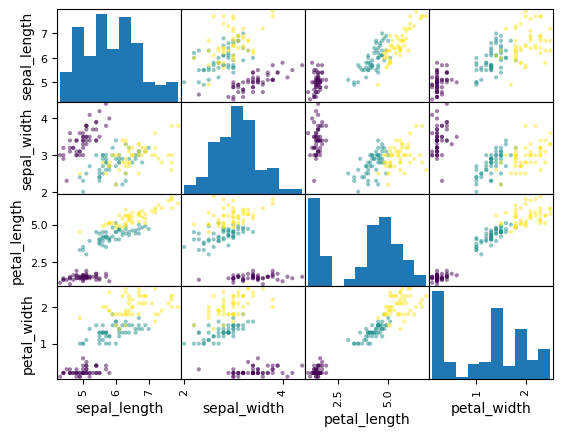

In [70]:
pd.plotting.scatter_matrix(df_iris,c=df_iris.species.cat.codes)

**12)**[P] Read about the seaborn `pairplot()` function, then use it to generate one of the most useful scatterplots matrices you'll see with this data. (It won't be too different than the scatter_matrix function,just easier to create, and the diagonal density plots are much better.)Take a moment to study the plot, and really try to understand just how much information this plot is conveying. Be sure to figure out how to distinguish the species by color.

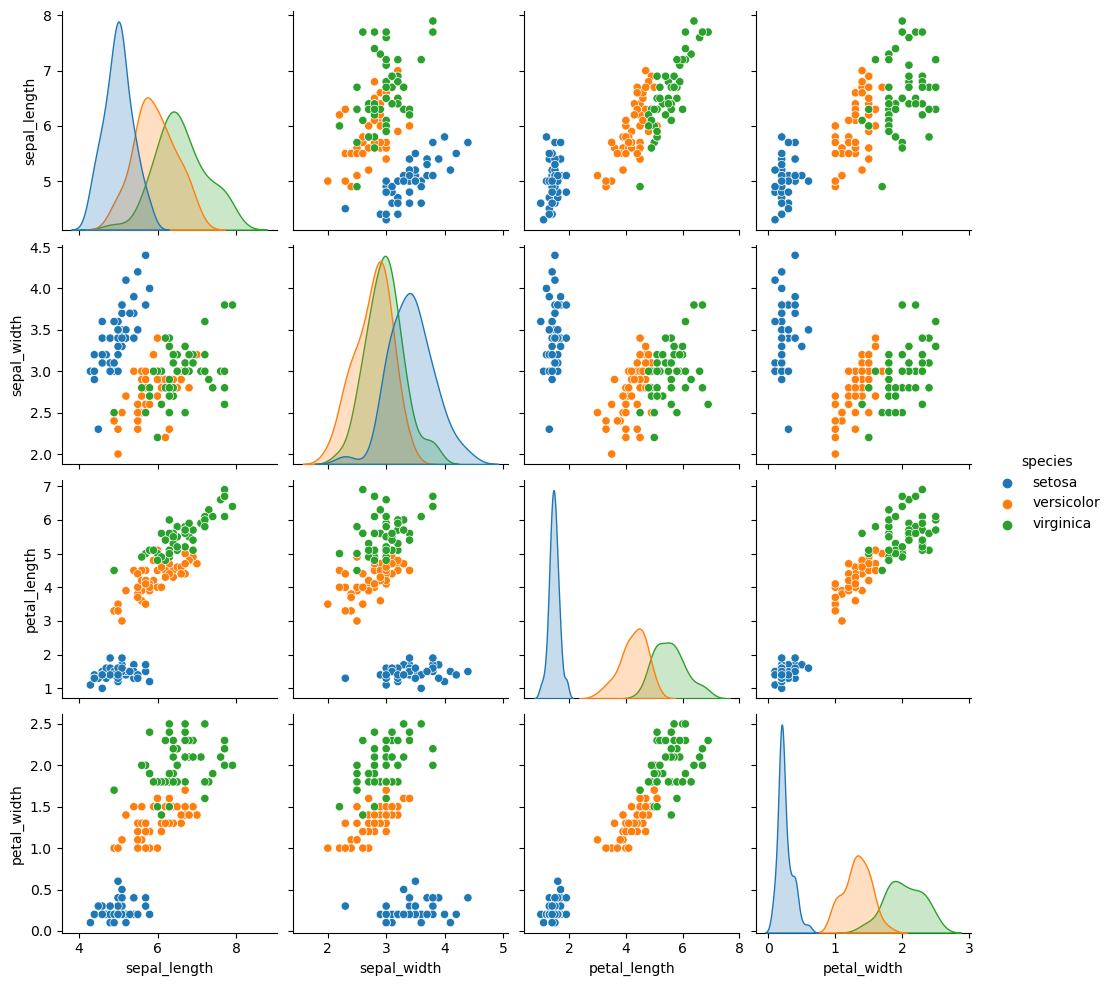

In [72]:
sns.pairplot(df_iris,hue='species')

**13)**[M] From your observations, which species do you expect to have the best classifier performance? Why? 

I expect Setosa to be the easiest to classify, since its distribution is the most distinct from the other species across all variables. You can observe this in the pairplot above.

---

OK. Let's get started with our first adventure into machine learning using scikit-learn. So far, you've learned a few different methods for modeling data. The majority of this lab will be designed to get you going with creating models, but there will be more emphasis on evaluation (performance on your training data) and validation (performance on your test data) of your models. Follow along, and as usual, you are encouraged to take extra notes in your markdown fileas these labs will make great references for you. Make the most of this lab!There is a lot here, and it represents the typical workflow of those who actually work with these types of data modeling problemsusing machine learning in practice. The next lab will give you more opportunities to explore sklearn with more challenging data. However, you need to learn theAPI with the basics first.

We will start simple, but will progressively, and quickly,release you to use Googleand other sitesto guide your own learning to find the answers.

Before you begin, read through the scikit tutorial's first section that introduces the user to machine learning with scikit-learn. It's mostly review, but will have someinformation and examples that could be quite helpful. Keep the tutorial and user guide handy for the remainder of the semester. You will surely need it!

**Do NOT use the iris data built into scikit-learn! Just keep working with the data you have already loaded in above.**

## Preparing our data for modeling

When you are done with preprocessing, you will have a data frame that contains all of your data ready to model. Even before you split your data into training and test data, most modeling methods will require you to separate the independent (predictor) variables and the dependent (target) variable(s). The convention generally followed is to use the name X to represent the data frame for your independent variables,and the target variable is denotedy. Both should be data frames, though if yis a single variable (most common), then it's OK to represent it as a pd.Series or even a np.array object.

**14)**[P] Split your data frame into X and y, where Xis a data frame with only your four predictor variables, and y represents only the target class, species. Output the names of the columns and the shape of both just to confirm that they both have the same number of observations, and that the number of variables in each are correct. You should have (150, 4), and (150, 1) respectively.

In [84]:
X=df_iris.iloc[:,:-1]
y=df_iris.iloc[:,-1:]
print(X.shape)
print(X.columns)

(150, 4)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [85]:
print(y.shape)
print(y.columns)

(150, 1)
Index(['species'], dtype='object')


---
## Building our classifier

We're going to dive right inand build a classifier using default hyperparameters, usingALL of our datafor training data. Since we started with the decision tree model, let's begin there. The model we want to begin with is the first model we learned about in class –the DecisionTreeClassifier. You can read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Generally, the sklearn documentation uses a standard convention naming all classifier objects as clf. All classifiers have a common interface: you use fit()to train a model with training data, and predict()to generate predictions on any data it is given. A common interface like this makes is incredibly easy to try out different models on your data.

**NOTE: You will need to be sure you import the proper libraries from sklearn! You will not be told which packages to import here.**

NOTE: Remember the standard machine learning pipeline:
1) Clean your data
2) Build your model
3) Evaluation –Evaluate model performance on training data (same data used to build the model.If your performance on training data is bad, there is no point in continuing to validation.)
4) Validation –Validate the model by assessing performance on test data (i.e. different data than training data

Whenever I work with a new classifier, I always try to ensure the classifier can be trained with ALL of my data, and then predict back that same data. Don't bother jumping into validation of your model with cross-validation until you know the classifier can at least do well predictingthe data that youtrained it with! If it can't even do that, then something has gone horribly wrong.

---
**15)**[P] Create an instance of a decision tree classifier using `DecisionTreeCassifier()` with default parameters. Name the classifier clf. Train the classifier with the entire dataset(i.e. all of Xand y.) Show the classifier after training by simply include `print(clf)` so you can see the default parameters used to build the classifier

In [107]:
clf=DecisionTreeClassifier()
clf = clf.fit(X, y)
print(clf)
print('\n')
print(tree.export_text(clf))

DecisionTreeClassifier()


|--- feature_2 <= 2.45
|   |--- class: setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



**16)**[P] Remember that one of the most popular reasons for using decision trees is because the model is easily visualized for model interpretation purposes.Use the `plot_tree` method to plot the tree. Explore the arguments to be sure that nodes are shaded by target class. Feature and class names should be shown. You should notice that the class you expected to perform well due to a clear decision boundary noted in your EDA above is indeed perfectly classified with only one node off the root node.

[Text(0.5, 0.9166666666666666, 'petal_length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal_width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal_length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal_width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal_width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.38461538461538464, 0.25, 'gini = 

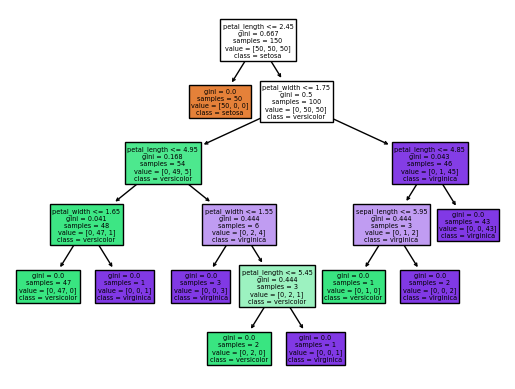

In [119]:
tree.plot_tree(clf,feature_names=X.columns,class_names=y.species.unique(),filled=True)

**17)**[P] -Use this model to predict back your training data to evaluate your model. Nameyour predictions y_pred.Then, report the accuracyusing the scoremethod on the classifier. 

In [124]:
y_pred=clf.predict(X)
metrics.accuracy_score(y,y_pred)

1.0

**18)**[M] You should see 100% accuracy. Why are you getting a perfect score?

There are no parameters set to limit over specification, so the DT runs until it has 100% purity for each species. Also havent the split the data into train and test data yet.

**19)**[P] Let's simplify our tree structure. Create a new tree, but adjust the pruning / complexity parameters. How? We'll keep this simple. Ensure that every leaf in the tree containsat least 5 samples. Show the tree that you induced, and again store your predictions as `y_pred`.Then, show the accuracy.(It should be 97.3%)

In [129]:
clf=DecisionTreeClassifier(min_samples_leaf=5)
clf=clf.fit(X,y)
y_pred=clf.predict(X)
print('Accuracy: {:.2f}%'.format(metrics.accuracy_score(y,y_pred)*100))

Accuracy: 97.33%


**20)**[M/P] OK –clearly we have lower accuracy. Dive deeper. **Accuracy** is usually not a good measure of classifier performance. (This is certainly true for imbalanced data, though not as problematic for these data because each class has equal representation.)  Look up the function `classification_report`. This outputs a lotof performance information! 

(You are strongly encouraged(not required) to delve into understanding what the micro, macro, and weighted average readings mean.Take notes in this section if you are inclined to do so. This function will do a LOT for you!)

Which class had the lowest precision? Which had the lowest recall?

'virginica' had the lowest precision, 'versicolor' had the lowest recall.

In [132]:
print(metrics.classification_report(y,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



**21)**[P] Output a confusion matrix using the `confusion_matrix` method in `sklearn.metrics`. Your result should look like a square matrix, where rows are the true labels, and the columns are the predicted labels, and the diagonal represents the cases where the true label and predicted label match.

In [134]:
print(metrics.confusion_matrix(y,y_pred))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


**22)**[P] Even better! Use the `plot_confusion_matrix` to output an excellent visual summary of the classifier performance. Your result should look as follows:

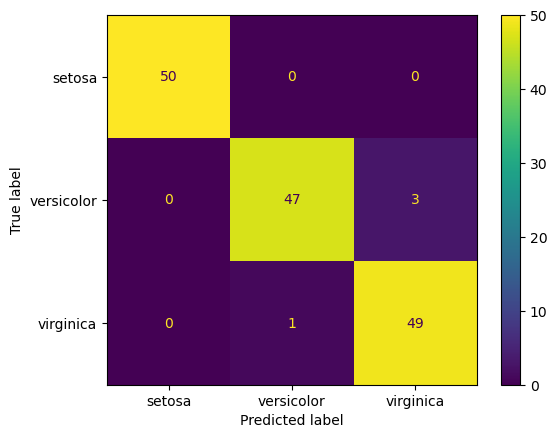

In [140]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y,y_pred),display_labels=clf.classes_).plot()

**23)**[M] Interpret your confusion matrix and classification report. Which class is performing the best? Which is performing the worst? How many total incorrect predictions?

Setosa is performing the best (50/50), versicolor the worst (47/50). 4 total incorrect predictions.

---
## Evaluation vs.Validation 

Up to now you've only really evaluated your model, where you build a model, and use it to predict back your training data. Once you have good results with training data, it's time to partition our data into training and testing datasets. Then, using the test data, we can validate our model to determine that it indeed is not overfitting our model.

Cross validation is the most common technique used to validate a machine learned model. There are many different approaches to validation (which has been, or will soon be covered in lecture!) We're going to start pretty simple. Fortunately, scikit-learn has plenty of useful functions to assist with the evaluation and validation of your model.

**24)** You need to create a train / test split of your data to properly validate your model. Read about the function in the scikit-learn user guide called `train_test_split`. in the package `sklearn.model_selection`. Then, use it to split your data into an 70% /30% split of training and testing data, respectively. You should end up with four data frames, denoted `X_train`, `X_test`, `Y_train`, `Y_test`. Use an initial random seed of 0. Be sure to shuffle the data (verify that this is a default setting.) Show the dimensions of each of these(i.e. how many entries in each?)

<sub> NOTE: Technically, `train_test_split`, like most scikit-learn modules, ignore pandas, and return numpy arrays. If you properly set up your data, and maintain your types throughout, it will do a reasonable job maintaining those types. I generally find it's important to keep my data, and splits, my predicted  values, etc. all as pandas DataFrames, but this is a matter of preference.If you are missing your column and index variables, it's most likely because you lost type information at some point in your pipeline. Just cast your data back to a pandas DataFrame and restore those important variables.

In [354]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)

(105, 4)


In [355]:
print(X_test.shape)

(45, 4)


In [356]:
print(y_train.shape)

(105, 1)


In [357]:
print(y_test.shape)

(45, 1)


**25)** Create anewinstance of `DecisionTreeClassifier` with an initial random seed value of 100, and a minimum number of samples in a leaf set to 5.Store the classifier as `clf`. Train your classifier with your training data. 

In [358]:
clf=DecisionTreeClassifier(min_samples_leaf=5,random_state=100)
clf=clf.fit(X_train,y_train)

**26)** Use this model to predict the labels on yourtrainingdata and your test data. Call your predictions y_pred_train.and y_pred_test. Show the accuracy of your classifier on both your training data and test data.

In [359]:
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)
print('Training Accuracy: {:.2f}%'.format(metrics.accuracy_score(y_train,y_pred_train)*100))
print('Test Accuracy: {:.2f}%'.format(metrics.accuracy_score(y_test,y_pred_test)*100))

Training Accuracy: 96.19%
Test Accuracy: 91.11%


**27)**[P/M] Use the classification report and confusion matrix techniques discussedabove to assess the performance of your classifier onboth the training andthe test data (i.e. do evaluation andvalidation of your model!)Summarize your findings.

In [360]:
print(metrics.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.91      0.97      0.94        32
   virginica       0.97      0.92      0.95        39

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [361]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.85      0.94      0.89        18
   virginica       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45



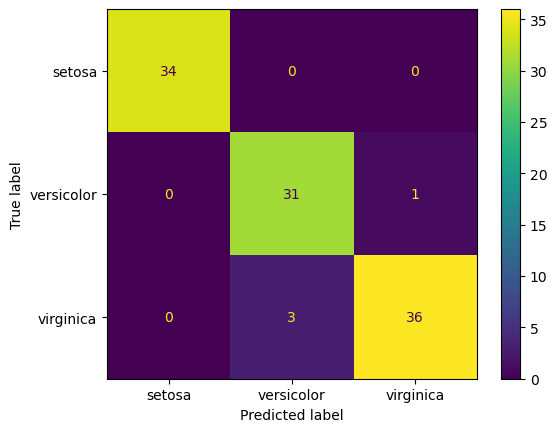

In [362]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_train,y_pred_train),display_labels=clf.classes_).plot()

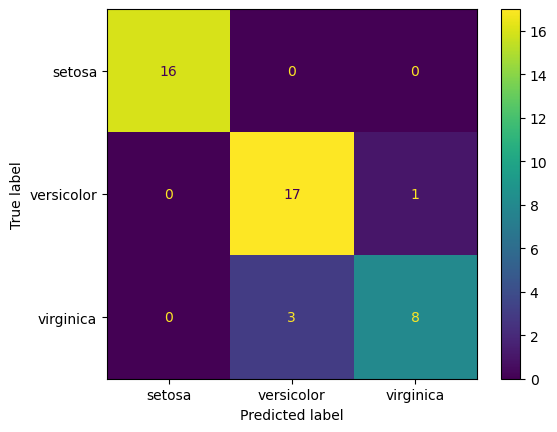

In [363]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test,y_pred_test),display_labels=clf.classes_).plot()

Using the train/test split, the setosa species still performed the best, while virginica performed the worst. 

**28)**[P] Quite often, when we have misclassifications, it's important to take the time to dig into your test data to determine which observations are being misclassified. Use data selection techniques to output the data that are being misclassified  in the test data only.

In [364]:
y_pred_test=pd.DataFrame({"species":y_pred_test},index=y_test.index)

In [365]:
X_test.loc[y_test.compare(y_pred_test).index,:]

,sepal_length,sepal_width,petal_length,petal_width
121,5.6,2.8,4.9,2.0
126,6.2,2.8,4.8,1.8
127,6.1,3.0,4.9,1.8
83,6.0,2.7,5.1,1.6


**29)** [P] It's even more interesting when you can visualize where in your feature space your classifier might be missing something. Create a scatterplot matrix, but this time, highlight the instance(s) that are being misclassified. 

(HOW? Can you create a new variable that represents the accuracy of the prediction? Use it as another dimension?A new color? A larger point size? Any scatter plot you can come up with that will highlight the location of the misclassified data receives full credit. This is an important step in understanding how to deal with problematic data.)

For example, this is one square of a scatter matrix that highlighted the observations that were mis-classified. This is a nice visual indicator that, as expected, they were instances falling on the divide between versicolor and virginicia 

So, that was awesome, right? ("Yes, I know!" you say.) But, you aren't following the standard industry practice of performing true **k-fold cross validation**. 

In [231]:
X_test['predicted']="Correct"

In [235]:
X_test.loc[y_test.compare(y_pred_test).index,'predicted']="Incorrect"

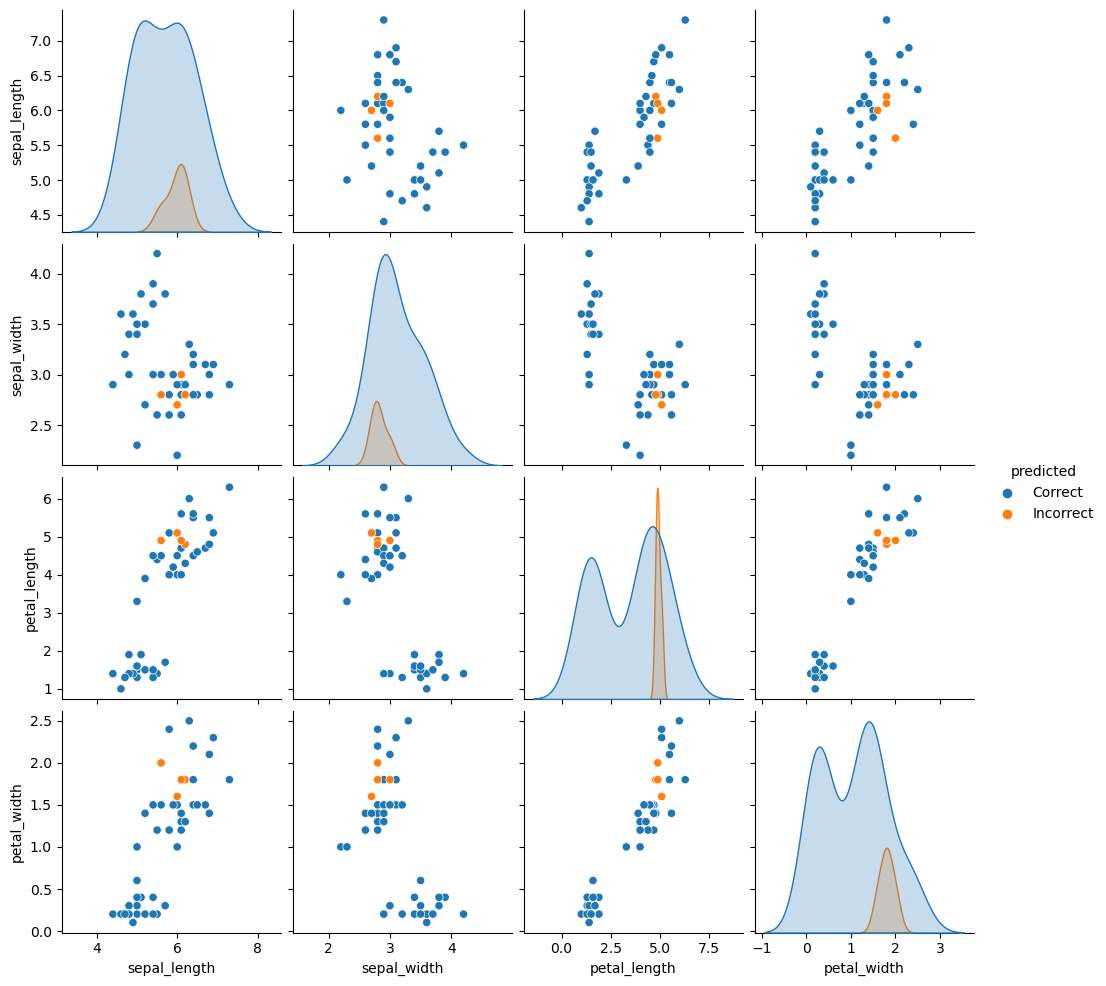

In [237]:
sns.pairplot(X_test,hue='predicted')

---
## K-fold Cross Validation

**30)**[M/P] Read about the `KFold`class. State what a `KFold` cross validation object will do for you. Then, create an instance of `KFold` with 10 splits, an initial seed of 100, and be sure to shuffle your data. Call your instance `kfold`. 

Kfold cross validation will split your data into k folds, where you can iterate through each split, and it ends up that all of the data gets used as training data by the end of iterating through k foldf

In [289]:
kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=100)

**31)**[P] Read about the `split()` method for `KFold`. Itwill help you iterate through each fold of your data. Take the time to understand how it works! If you set this up right, you will have a loop that will let you easily select train and test data for each fold. Once you do that, then you are merely repeating what you did already for the 70/30 split data above! For each fold, you fit a new model on the training data for that fold, then validate the modelon the test data for the same fold. After 10 folds, you will have validated your model using your entire dataset as validation data!

Inside your loop, you should NOT print out your classification results. (However, sometimes it's useful to use Python timing functions to collect timing on different model building tasks, and that would be done inside the loop, placing a time stamp before and after the call to `fit()`.) Only store the results of predicting on the test fold. I would accumulate my true class label and my predictions in a separate data frame, called `df_results`. 

If you do this right, you will have a new data frame with a variable, such as "`dt_def`",or "`dt_default`",representing the prediction from the default decision tree classifier.

In [350]:
df_results=pd.DataFrame(columns=['prediction','true_class'])
for train, test in kfold.split(X,y):
    clf=DecisionTreeClassifier()
    clf=clf.fit(X.loc[train],y.loc[train])
    df_results=pd.concat([df_results,pd.DataFrame({'prediction':clf.predict(X.loc[test]),'true_class':y.iloc[:,0][test]})])

In [292]:
df_results

,prediction,true_class
1,setosa,setosa
11,setosa,setosa
15,setosa,setosa
26,setosa,setosa
28,setosa,setosa
...,...,...
98,versicolor,versicolor
103,virginica,virginica
107,virginica,virginica
138,versicolor,virginica


**32)**[P] Print out a classification report from your 10 fold cross validation. Also print out your confusion matrix. NOTE: You won't be able to use the `plot_confusion_matrix` method here, but you should be able to use the `confusion_matrix` method and seaborn's `heatmap` method. For example (using a poor color map!):

In [302]:
print(metrics.classification_report(df_results.prediction,df_results.true_class))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.90      0.91        51
   virginica       0.90      0.92      0.91        49

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



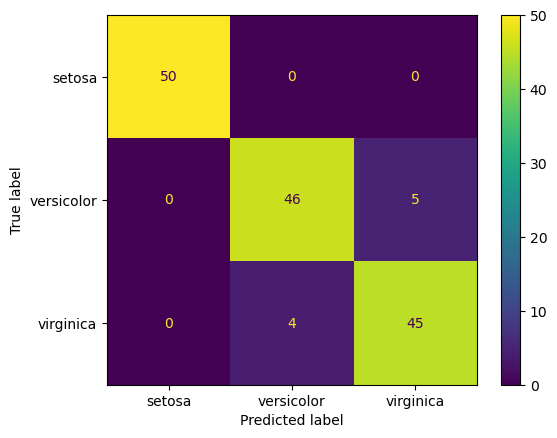

In [294]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(df_results.prediction,df_results.true_class),display_labels=clf.classes_).plot()

**33)**[P] Select and generate a report all of your test instances that were misclassified from the 10 fold cross validation. Also, generate a scatterplot that highlights the location of the instances that were misclassified. 

In [305]:
misclassified=df_iris.loc[df_results.prediction.compare(df_results.true_class).index,:]
misclassified

,sepal_length,sepal_width,petal_length,petal_width,species
77,6.7,3.0,5.0,1.7,versicolor
119,6.0,2.2,5.0,1.5,virginica
133,6.3,2.8,5.1,1.5,virginica
57,4.9,2.4,3.3,1.0,versicolor
70,5.9,3.2,4.8,1.8,versicolor
83,6.0,2.7,5.1,1.6,versicolor
106,4.9,2.5,4.5,1.7,virginica
129,7.2,3.0,5.8,1.6,virginica
138,6.0,3.0,4.8,1.8,virginica


In [309]:
X['prediction']='Correct'

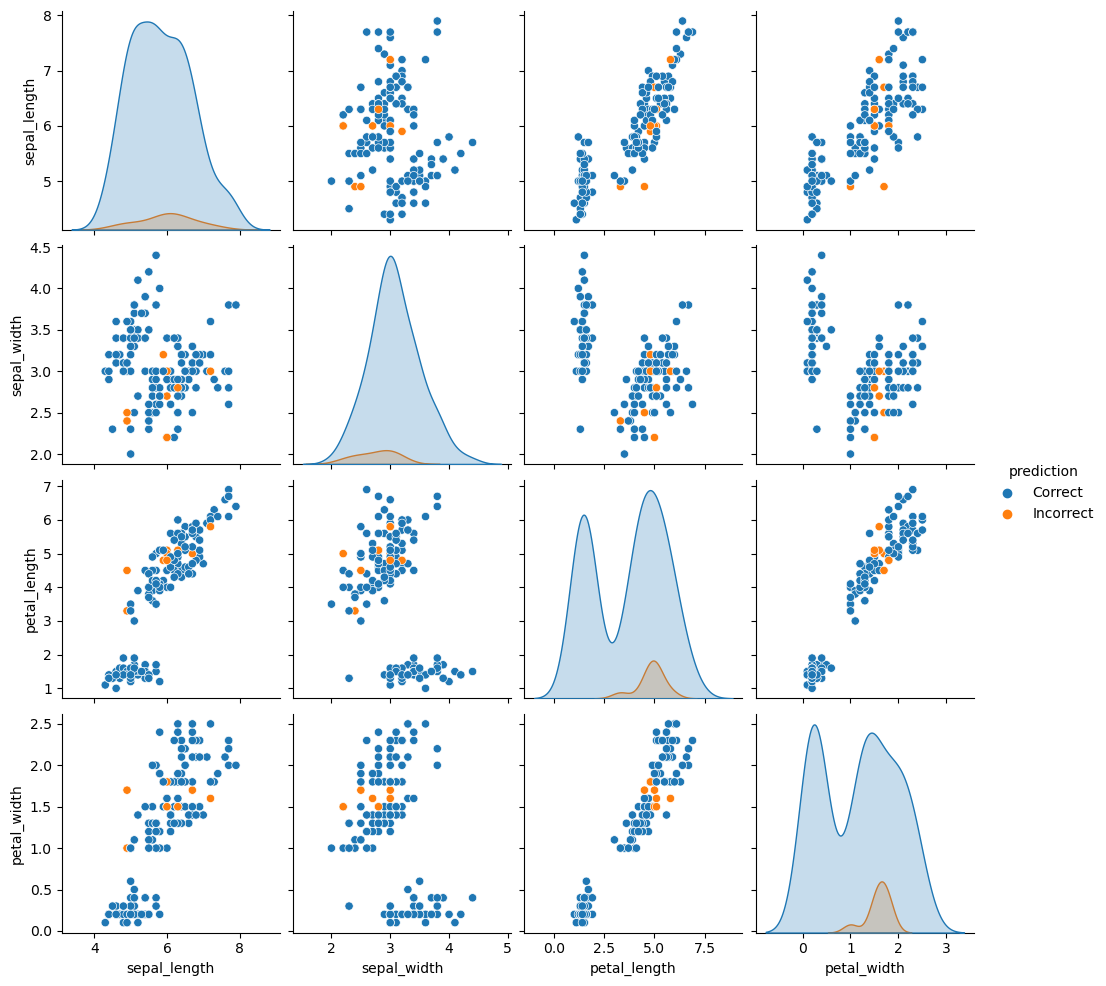

In [313]:
X.loc[df_results.prediction.compare(df_results.true_class).index,'prediction']='Incorrect'
sns.pairplot(X,hue='prediction')

**34)**[P] As you would expect, the scikit-learn framework has some powerful methods that can run an entire cross validation and report whatever metrics you want. Read about the `cross_validate` method, then use it to run a 10-fold cross validationon a default decision tree, reporting back '`accuracy`'and '`f1_macro`' measurements on both the training and testing data. Report your results as a single data frame. Your results should look as follows.

In [320]:
pd.DataFrame(model_selection.cross_validate(clf,X,y,cv=10,scoring=('accuracy', 'f1_macro'),return_train_score=True))

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_macro,train_f1_macro
0,0.008017,0.007879,1.000000,1.0,1.000000,1.0
1,0.008045,0.006658,0.933333,1.0,0.932660,1.0
2,0.007964,0.011238,1.000000,1.0,1.000000,1.0
3,0.011472,0.000000,0.933333,1.0,0.932660,1.0
4,0.007718,0.000000,0.933333,1.0,0.932660,1.0
5,0.005983,0.004986,0.866667,1.0,0.866667,1.0
6,0.006017,0.004987,0.933333,1.0,0.932660,1.0
7,0.007021,0.004989,0.933333,1.0,0.932660,1.0
8,0.007979,0.005985,1.000000,1.0,1.000000,1.0
9,0.004920,0.008039,1.000000,1.0,1.000000,1.0


**35)**[M] On the above, what are the variables `fit_time` and `score_time`?

fit_time: The time for fitting the estimator (clf here) on the train set for each cv split. 

score_time: The time for scoring the estimator on the test set for each cv split.

**36)**[P] OK, one last function for validation purposes. Read about the function `cross_val_predict`. This is perhaps among the most powerful of the model selection functions provided by sklearn, as itpretty much does everything we need in one function call.And, the predictions are returned! You canthen use these predictions to run a `classification_report` and report confusion matrices.  Use the `cross_val_predictfunction` to run a 10-fold cross validation with a default decision tree, and print the `classification_report` on your results.

In [322]:
y_pred = model_selection.cross_val_predict(clf, X, y, cv=10)
print(metrics.classification_report(y,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



**37)** For your last task, you will perform model comparison tasks.Use the cross_val_predictmethod to compare the predictive performance on the following models:

*  A default decision tree
*  A decision tree with "entropy" for measuring impurity
*  A KNeighborsClassifierwith a twodifferent values of k (.)
*  MultinomialNBclassifier (sklearn's Naïve Bayes implementation)

Compare and contrast the performance results between the different models. Which one would you choose?

In [345]:
clf=DecisionTreeClassifier()
y_pred = model_selection.cross_val_predict(clf, X, y, cv=10)
print(metrics.classification_report(y,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.94      0.93        50
   virginica       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [347]:
clf=DecisionTreeClassifier(criterion='entropy')
y_pred = model_selection.cross_val_predict(clf, X, y, cv=10)
print(metrics.classification_report(y,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [348]:
knn = KNeighborsClassifier(n_neighbors=3)
y_pred = model_selection.cross_val_predict(knn, X, y.iloc[:,0], cv=10)
print(metrics.classification_report(y,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [349]:
knn = KNeighborsClassifier(n_neighbors=10)
y_pred = model_selection.cross_val_predict(knn, X, y.iloc[:,0], cv=10)
print(metrics.classification_report(y,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.96      0.95        50
   virginica       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [342]:
NB = MultinomialNB()
y_pred = model_selection.cross_val_predict(NB, X, y.iloc[:,0], cv=10)
print(metrics.classification_report(y,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.92      0.93        50
   virginica       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



Looking at the classification reports, I would choose KNN classifier with 3 nearest neighbors, as it provides the most true positives for the species that is typically the worst, versicolor. The 10 neighbor KNN does not seem to provide a significant improvement over the 3 neighbor KNN.